In [1]:
import torch

In [15]:
q_idx = torch.arange(0, 4096 + 77 * 4)
kv_idx = torch.arange(0, 4096 + 77 * 4)
mesh = torch.meshgrid(q_idx, kv_idx, indexing="ij")

torch.where(torch.logical_and(mesh[0] > 4096 + 154, torch.logical_and(4096 < mesh[1], mesh[1] < 4096 + 154)), -float("inf"), 1)

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])

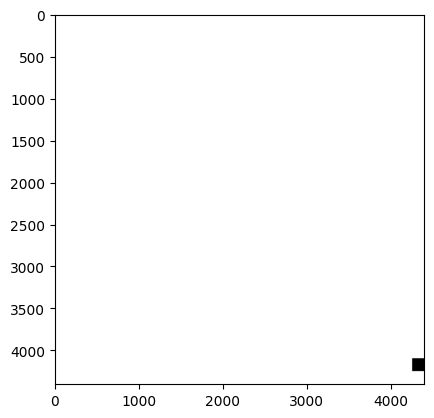

In [5]:
import pylab

pylab.imshow(torch.where(torch.logical_and(mesh[1] > 4096 + 154, torch.logical_and(4096 < mesh[0], mesh[0] < 4096 + 154)), 0, 1).cpu().detach(), cmap="gray")

In [22]:
q_idx = mesh[1]
kv_idx = mesh[0]
neg_guidance = torch.where(torch.logical_and(q_idx < 4096, kv_idx > 4096 + 154), -100, 1) 
neg_to_pos = torch.where(torch.logical_and(q_idx > 4096 + 154, torch.logical_and(4096 < kv_idx, kv_idx < 4096 + 154)), -float("inf"), 1) 
pos_to_neg = torch.where(torch.logical_and(kv_idx > 4096 + 154, torch.logical_and(4096 < q_idx, q_idx < 4096 + 154)), -float("inf"), 1) 
a = neg_guidance * neg_to_pos * pos_to_neg

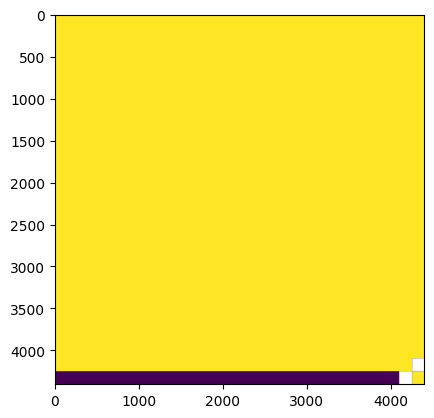

In [24]:
pylab.imshow(a * 1)

In [26]:
torch.tensor(-float("inf")) * 10

tensor(-inf)